In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sentiment_data.head()

In [6]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import os

# List files in your Google Drive
files = os.listdir('/content/drive/MyDrive/')
print(files)



['Assignment 2', 'Untitled folder', '20220610_163309.jpg', 'Assignment ', 'Classroom', 'Dave Cv.docx', 'Chapter 2 & 3.gdoc', 'Chapter 6 - Interpolation and Approximation.gdoc', 'Chapter 7 - Numerical Differentiatioin and Integration.gdoc', 'Course Checklist - UGR_2597_13 (1) (2).pdf', 'Course Checklist - UGR_2597_13 (1) (1).pdf', 'Dawit_Kindea_Assignment.pdf', 'dawit kindea (3).pdf', 'IMG_20231104_210735_795.jpg', 'IMG_20221108_095301_255.jpg', 'dawit kindea (2).pdf', 'dawit kindea (1).pdf', 'dawit kindea.pdf', 'Course Checklist - UGR_2597_13 (2).pdf', 'Copy of Google Workspace Skills Checklist_ ALX_AICE_Cohort 1 (3).gsheet', 'Copy of Google Workspace Skills Checklist_ ALX_AICE_Cohort 1 (2).gsheet', 'Copy of Google Workspace Skills Checklist_ ALX_AICE_Cohort 1 (1).gsheet', 'Copy of Google Workspace Skills Checklist_ ALX_AICE_Cohort 1.gsheet', 'Copy of ALX AICE: Milestone #1 Rubric (1).gdoc', 'ALX AICE', 'Copy of AICE Milestone #1 Worksheet (3).gdoc', 'Copy of AICE Milestone #1 Workshee

In [11]:
file_path = '/content/drive/MyDrive/raw_analyst_ratings.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [12]:
df.shape

(1407328, 6)

In [13]:
df.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [18]:
df.isnull().sum()

,0
Unnamed: 0,0
headline,0
url,0
publisher,0
date,0
stock,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [20]:
sentiment_data=df.copy()

In [21]:
SIA=SentimentIntensityAnalyzer()
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: SIA.polarity_scores(text=x)['compound'])

In [22]:
sentiment_data_copy=sentiment_data.copy()

In [23]:
sentiment_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.296


In [24]:
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000


In [25]:
sentiment_data["sentiment_cata"]=pd.cut(sentiment_data["sentiment"], bins=[ -1,-0.5,-0.0001,0.5,1], labels=["very negative", "negative", "nutral","postive"])

In [26]:
sentiment_data_count=sentiment_data["sentiment_cata"].value_counts()
sentiment_data_count

,count
sentiment_cata,
nutral,1070915
negative,182864
postive,109718
very negative,43831


In [27]:
sentiment_data_count_data=sentiment_data_count.reset_index()
sentiment_data_count_data.columns=["sentiment_cata","Count"]
sentiment_data_count_data.head()

,sentiment_cata,Count
0,nutral,1070915
1,negative,182864
2,postive,109718
3,very negative,43831


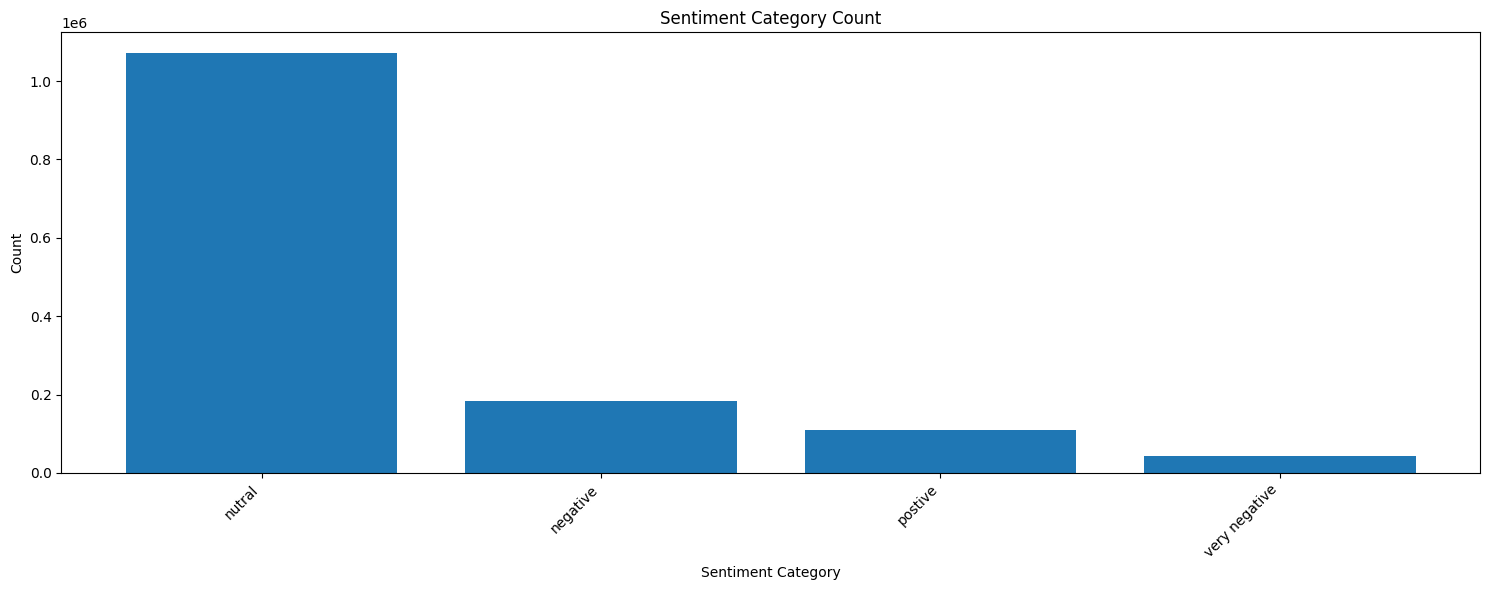

In [28]:
plt.figure(figsize=(15, 6))

plt.bar(sentiment_data_count_data["sentiment_cata"], sentiment_data_count_data["Count"])

plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.title("Sentiment Category Count")
plt.xticks(rotation=45, ha="right")


plt.tight_layout()
plt.show()

In [29]:
sentiment_data["date"]=pd.to_datetime(sentiment_data["date"], errors="coerce")


In [30]:
sentiment_data.set_index("date", inplace=True)

In [31]:
sentiment_data["date_format"] = sentiment_data.index.date

In [32]:
sentiment_data["year"] = sentiment_data.index.year
sentiment_data["month"] = sentiment_data.index.month
sentiment_data["day"] = sentiment_data.index.day
sentiment_data["WeekDay"] = sentiment_data.index.weekday
sentiment_data["Hour"] = sentiment_data.index.hour
sentiment_data["year_month"] = sentiment_data.index.to_period("M")

<ipython-input-32-44f42127af0f>:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sentiment_data["year_month"] = sentiment_data.index.to_period("M")


In [33]:
sentiment_data.head()

,Unnamed: 0,headline,url,publisher,stock,sentiment,sentiment_cata,date_format,year,month,day,WeekDay,Hour,year_month
date,,,,,,,,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.000,nutral,2020-06-05,2020.0,6.0,5.0,4.0,10.0,2020-06
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.000,nutral,2020-06-03,2020.0,6.0,3.0,2.0,10.0,2020-06
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.000,nutral,2020-05-26,2020.0,5.0,26.0,1.0,4.0,2020-05
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.000,nutral,2020-05-22,2020.0,5.0,22.0,4.0,12.0,2020-05
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.296,nutral,2020-05-22,2020.0,5.0,22.0,4.0,11.0,2020-05


In [34]:
year_sentiment_counts = sentiment_data.groupby(["year_month", "sentiment_cata"]).size().reset_index(name="count")
pivot_table_yealy = year_sentiment_counts.pivot(index="year_month", columns="sentiment_cata", values="count").fillna(0)
pivot_table_yealy.head()
pivot_table_yealy.index = pivot_table_yealy.index.astype(str)

<ipython-input-34-c3065c6fe3f3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_sentiment_counts = sentiment_data.groupby(["year_month", "sentiment_cata"]).size().reset_index(name="count")


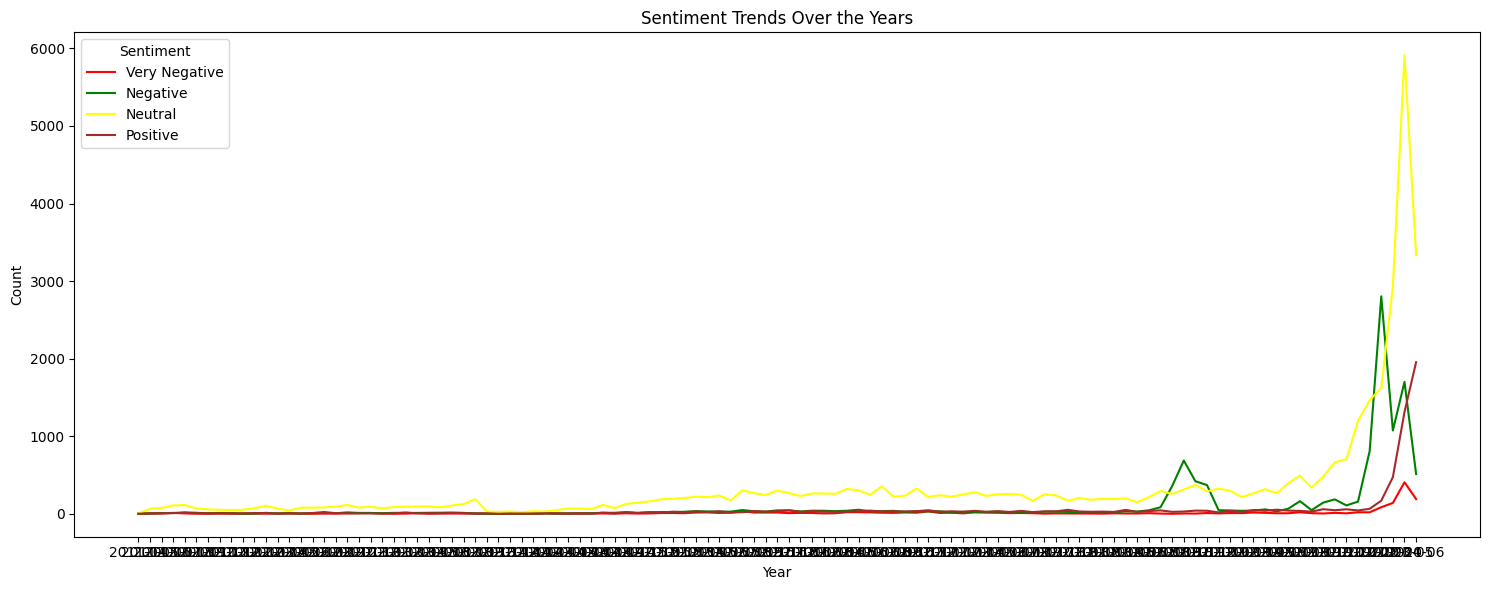

In [35]:
plt.figure(figsize=(15, 6))
plt.plot(pivot_table_yealy.index, pivot_table_yealy["very negative"], color="red", label="Very Negative")
plt.plot(pivot_table_yealy.index, pivot_table_yealy["negative"], color="green", label="Negative")
plt.plot(pivot_table_yealy.index, pivot_table_yealy["nutral"], color="yellow", label="Neutral")
plt.plot(pivot_table_yealy.index, pivot_table_yealy["postive"], color="brown", label="Positive")
plt.title("Sentiment Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Sentiment", loc="upper left")
plt.tight_layout()
plt.show()

In [36]:
yearly_sentiment_counts = sentiment_data.groupby(["year", "sentiment_cata"]).size().reset_index(name="count")
pivot_table_year = yearly_sentiment_counts.pivot(index="year", columns="sentiment_cata", values="count").fillna(0)


<ipython-input-36-bedc9556e486>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_sentiment_counts = sentiment_data.groupby(["year", "sentiment_cata"]).size().reset_index(name="count")


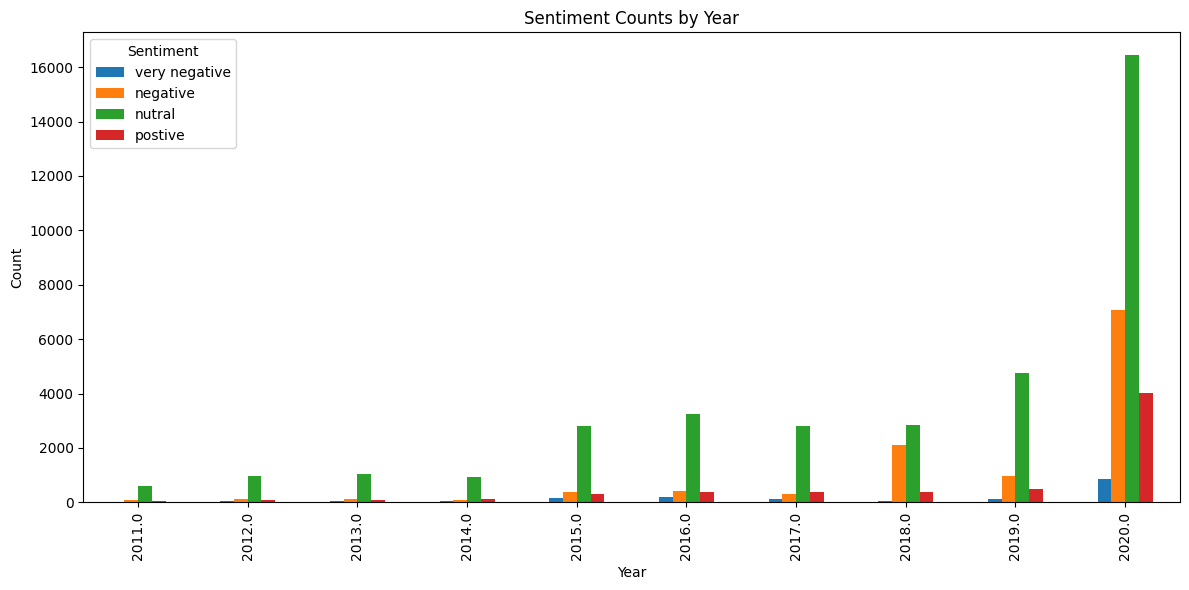

In [37]:
pivot_table_year.plot(kind='bar', figsize=(12, 6))
plt.title("Sentiment Counts by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


<ipython-input-38-fa24a9a94a9d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sentiment_counts = sentiment_data.groupby(["month", "sentiment_cata"]).size().reset_index(name="count")


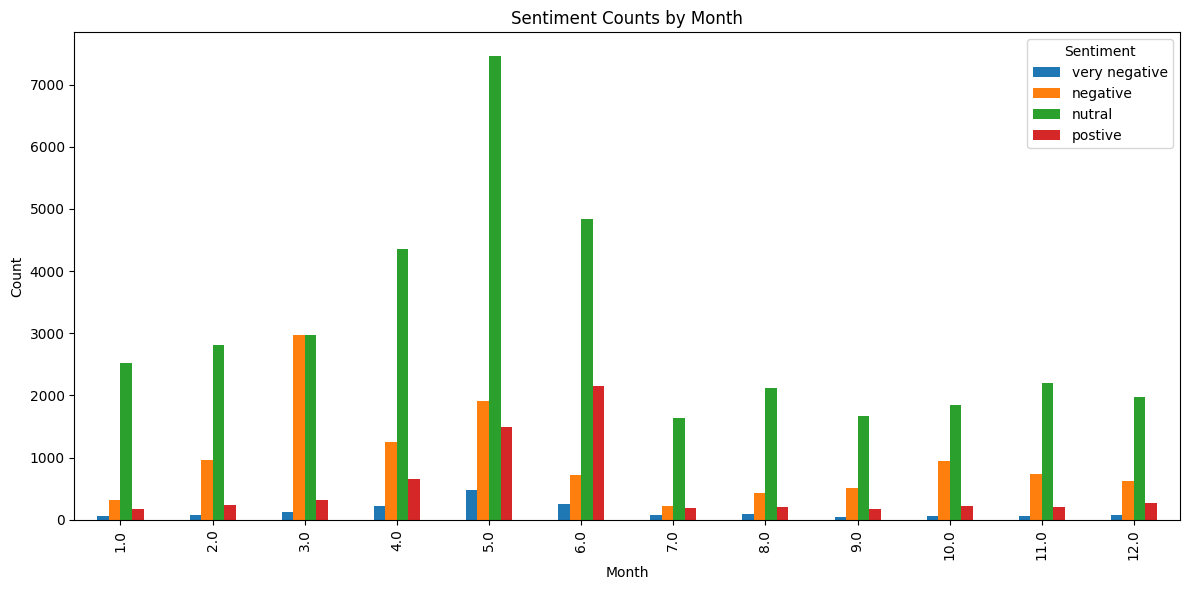

In [38]:
monthly_sentiment_counts = sentiment_data.groupby(["month", "sentiment_cata"]).size().reset_index(name="count")
pivot_table_month = monthly_sentiment_counts.pivot(index="month", columns="sentiment_cata", values="count").fillna(0)
pivot_table_month.plot(kind='bar', figsize=(12, 6))
plt.title("Sentiment Counts by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()



<ipython-input-39-10722ef6e14c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_sentiment_counts = sentiment_data.groupby(["day", "sentiment_cata"]).size().reset_index(name="count")


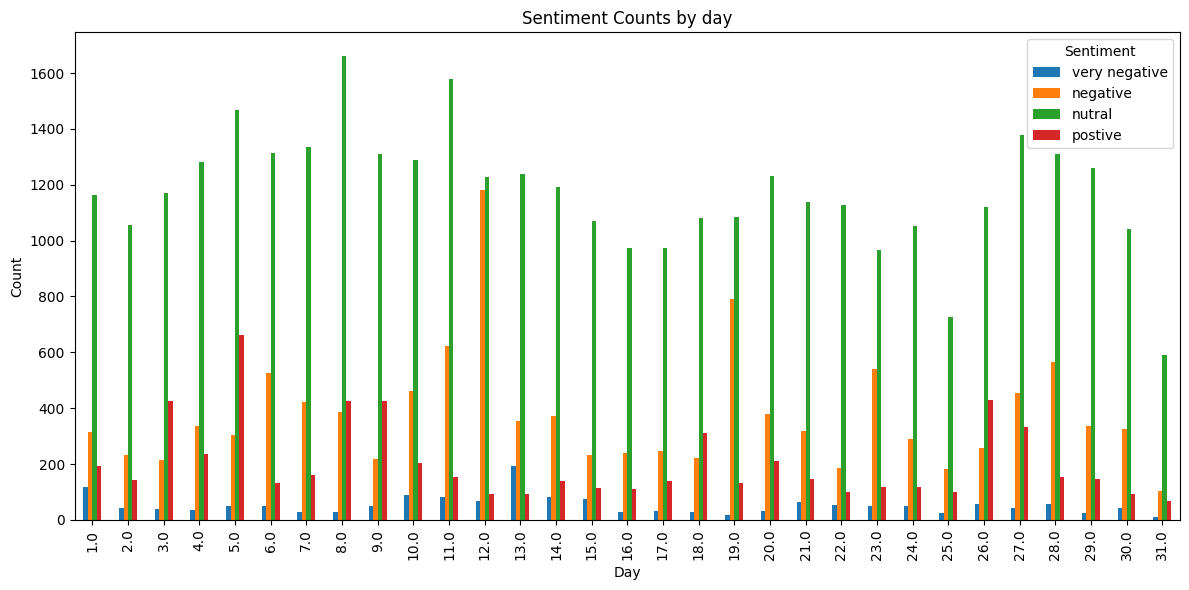

In [39]:
daily_sentiment_counts = sentiment_data.groupby(["day", "sentiment_cata"]).size().reset_index(name="count")
pivot_table_day = daily_sentiment_counts.pivot(index="day", columns="sentiment_cata", values="count").fillna(0)
pivot_table_day.plot(kind='bar', figsize=(12, 6))
plt.title("Sentiment Counts by day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()



<ipython-input-40-61a200cf9985>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_sentiment_counts = sentiment_data.groupby(["Hour", "sentiment_cata"]).size().reset_index(name="count")


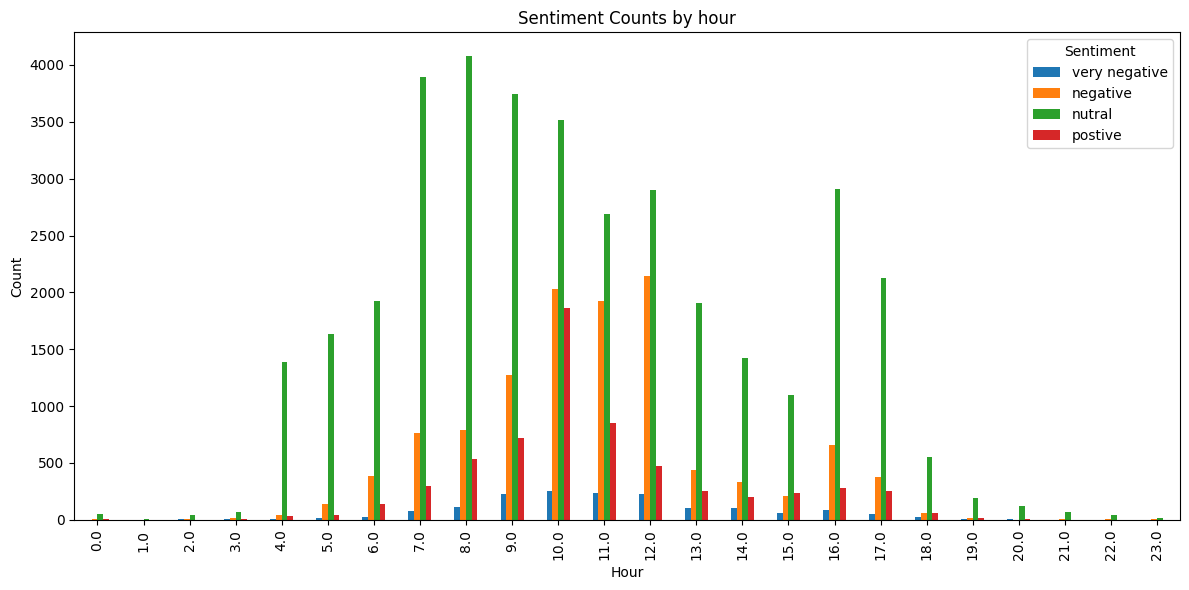

In [40]:
hourly_sentiment_counts = sentiment_data.groupby(["Hour", "sentiment_cata"]).size().reset_index(name="count")
pivot_table_hour = hourly_sentiment_counts.pivot(index="Hour", columns="sentiment_cata", values="count").fillna(0)
pivot_table_hour.plot(kind='bar', figsize=(12, 6))
plt.title("Sentiment Counts by hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


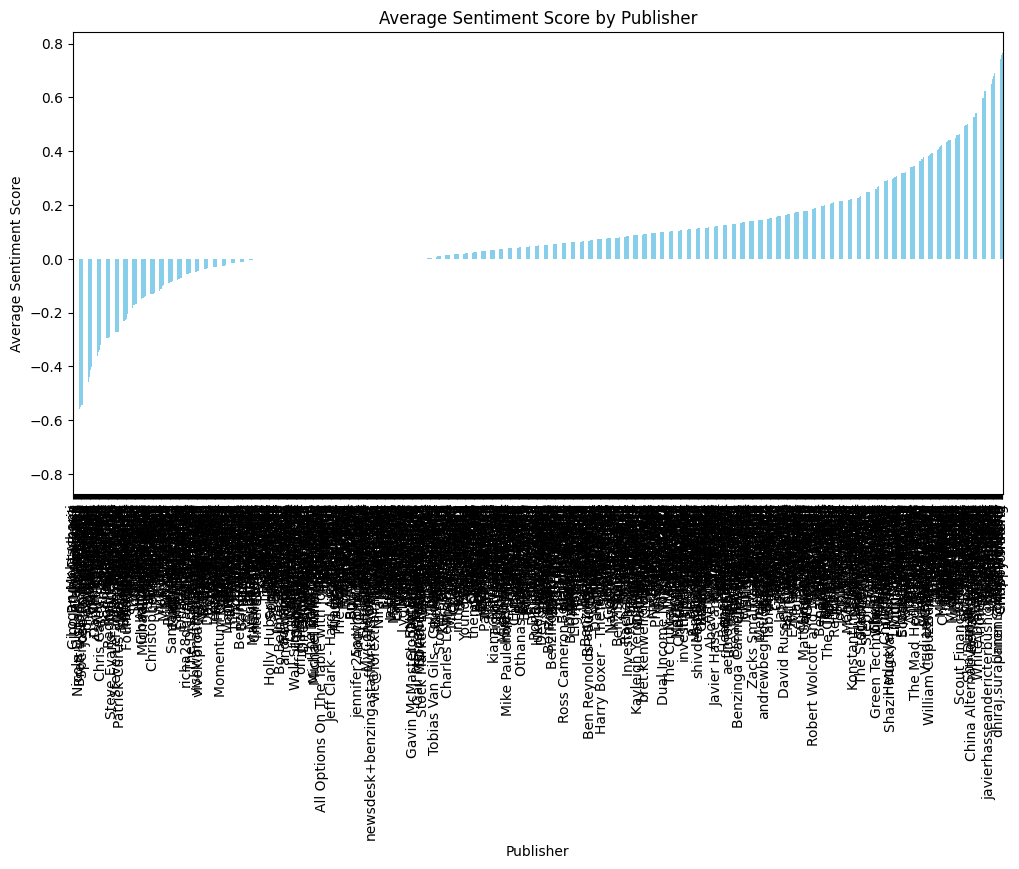

In [41]:
publisher_sentiment = sentiment_data.groupby('publisher')['sentiment'].mean().sort_values()

# Plot sentiment by publisher
publisher_sentiment.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Sentiment Score by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Average Sentiment Score')
plt.show()

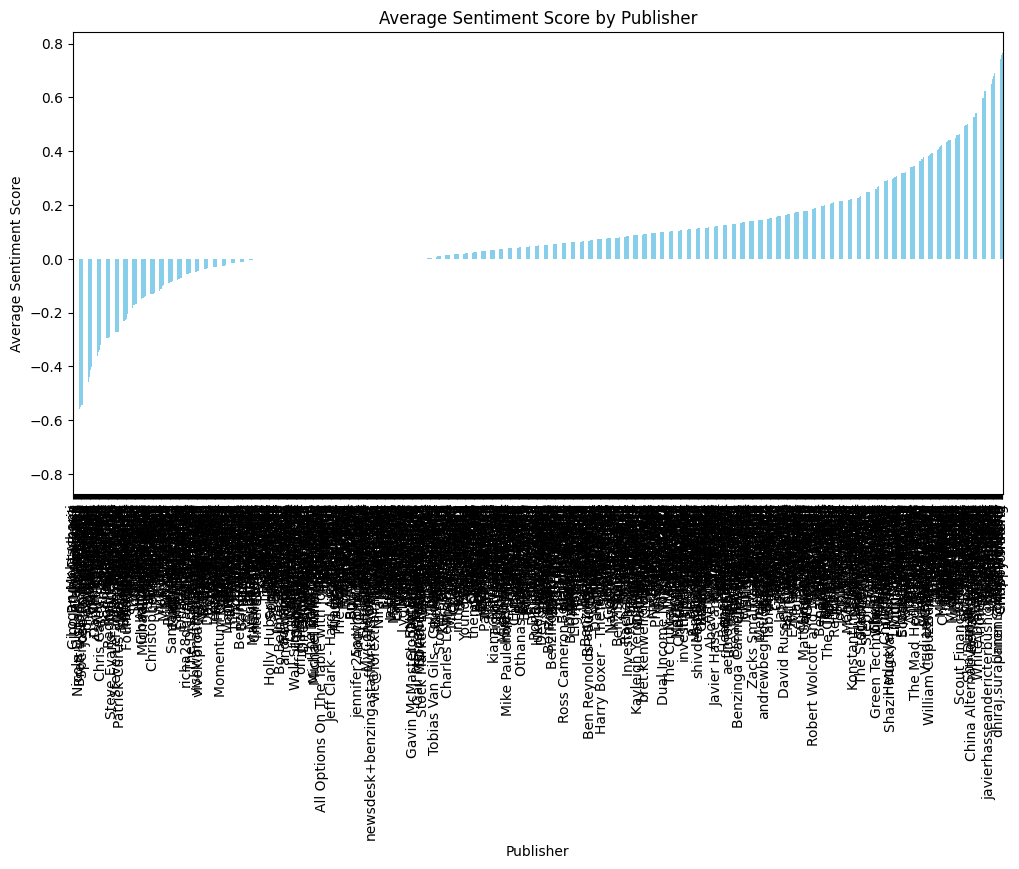

In [42]:
publisher_sentiment = sentiment_data.groupby('publisher')['sentiment'].mean().sort_values()

# Plot sentiment by publisher
publisher_sentiment.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Sentiment Score by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Average Sentiment Score')
plt.show()

<ipython-input-43-cfc479c8e4c9>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = sentiment_data.resample('M')['sentiment'].mean()


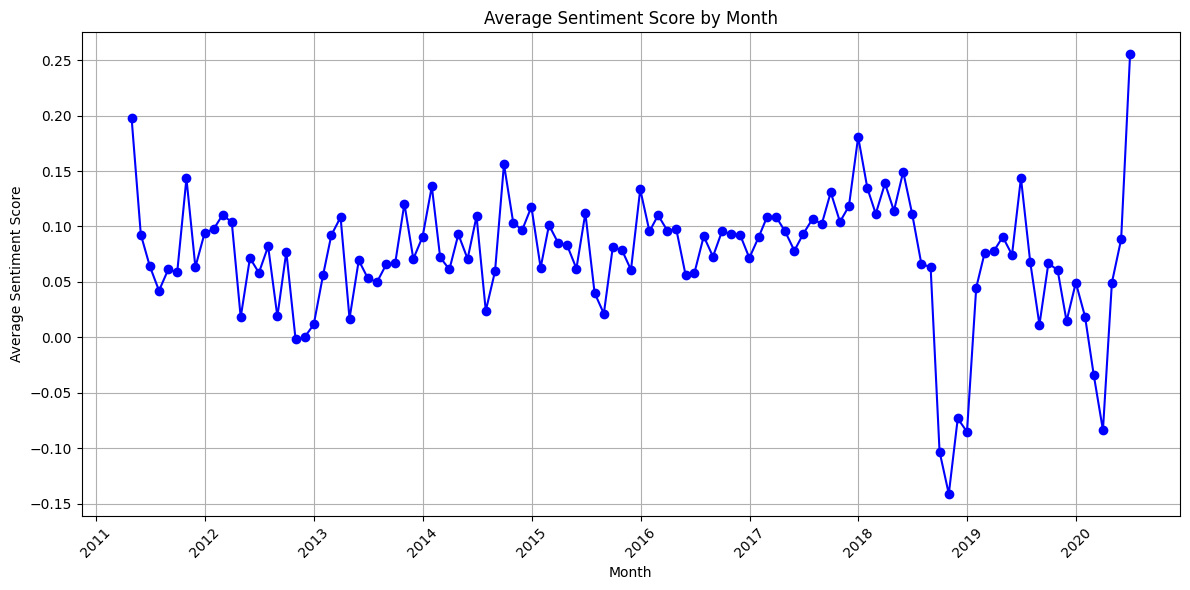

In [43]:
monthly_sentiment = sentiment_data.resample('M')['sentiment'].mean()

# Plot sentiment trend over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-', color='blue')
plt.title('Average Sentiment Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-44-aa421b8b08d3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_length = sentiment_data.groupby('sentiment_cata')['length_of_heading'].mean()


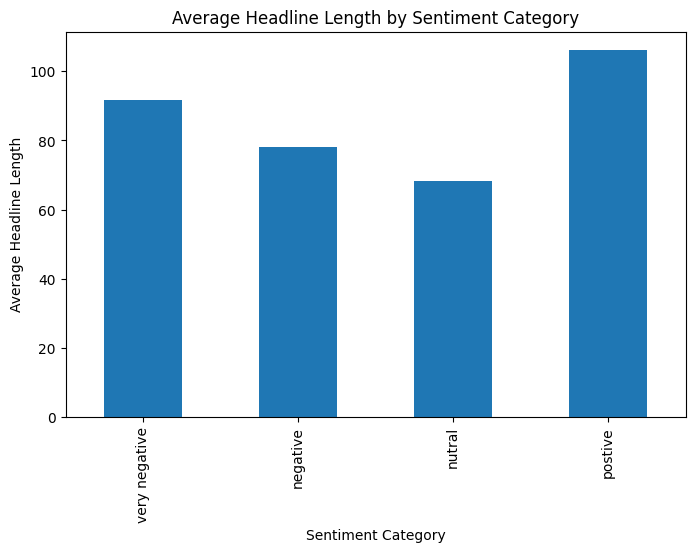

In [44]:
sentiment_data["length_of_heading"]=sentiment_data["headline"].apply(len)
sentiment_length = sentiment_data.groupby('sentiment_cata')['length_of_heading'].mean()

# Plot headline length by sentiment category
sentiment_length.plot(kind='bar', figsize=(8, 5))
plt.title('Average Headline Length by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Headline Length')
plt.show()

In [45]:
import re
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply text cleaning
sentiment_data['cleaned_text'] =sentiment_data['headline'].apply(clean_text)

In [46]:
sentiment_data.head()

,Unnamed: 0,headline,url,publisher,stock,sentiment,sentiment_cata,date_format,year,month,day,WeekDay,Hour,year_month,length_of_heading,cleaned_text
date,,,,,,,,,,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.000,nutral,2020-06-05,2020.0,6.0,5.0,4.0,10.0,2020-06,39,stocks that hit 52week highs on friday
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.000,nutral,2020-06-03,2020.0,6.0,3.0,2.0,10.0,2020-06,42,stocks that hit 52week highs on wednesday
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.000,nutral,2020-05-26,2020.0,5.0,26.0,1.0,4.0,2020-05,29,71 biggest movers from friday
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.000,nutral,2020-05-22,2020.0,5.0,22.0,4.0,12.0,2020-05,44,46 stocks moving in fridays midday session
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.296,nutral,2020-05-22,2020.0,5.0,22.0,4.0,11.0,2020-05,87,b of a securities maintains neutral on agilent...


In [50]:
from rake_nltk import Rake
r=Rake()

In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
def extract_keywords(text):
    if pd.isnull(text) or text.strip() == "":
        return []
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()

sentiment_data['keywords'] = sentiment_data['cleaned_text'].apply(extract_keywords)

sentiment_data.head()

,Unnamed: 0,headline,url,publisher,stock,sentiment,sentiment_cata,date_format,year,month,day,WeekDay,Hour,year_month,length_of_heading,cleaned_text,keywords
date,,,,,,,,,,,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.000,nutral,2020-06-05,2020.0,6.0,5.0,4.0,10.0,2020-06,39,stocks that hit 52week highs on friday,"[hit 52week highs, stocks, friday]"
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.000,nutral,2020-06-03,2020.0,6.0,3.0,2.0,10.0,2020-06,42,stocks that hit 52week highs on wednesday,"[hit 52week highs, wednesday, stocks]"
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.000,nutral,2020-05-26,2020.0,5.0,26.0,1.0,4.0,2020-05,29,71 biggest movers from friday,"[71 biggest movers, friday]"
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.000,nutral,2020-05-22,2020.0,5.0,22.0,4.0,12.0,2020-05,44,46 stocks moving in fridays midday session,"[fridays midday session, 46 stocks moving]"
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.296,nutral,2020-05-22,2020.0,5.0,22.0,4.0,11.0,2020-05,87,b of a securities maintains neutral on agilent...,"[agilent technologies raises price target, sec..."


In [2]:
!pip install counter

  Preparing metadata (setup.py) ... done
  Created wheel for counter: filename=Counter-1.0.0-py3-none-any.whl size=5394 sha256=c2bebe9d8bea42e94c04c7b611390f5007503cbdbee4d076f60bbd66817ab6f9
  Stored in directory: /root/.cache/pip/wheels/e3/02/6d/d5c0838427a060718c6060ae4d24da95a0e0df0d7a3dab8040
Successfully built counter


In [52]:
from collections import Counter
import itertools

# Efficiently flatten the list of lists using itertools.chain
all_keywords = itertools.chain.from_iterable(sentiment_data['keywords'])

# Count keywords
keyword_counts = Counter(all_keywords)

# Convert to a DataFrame and sort
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Frequency'])
keyword_df = keyword_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top 10 keywords (optional)
print(keyword_df.head(10))

                             Keyword  Frequency
0                             stocks      48172
1                 earnings scheduled      32037
2                             shares      31897
3                              watch      17462
4                                buy      15583
5                     trading higher      15249
6  benzingas top upgrades downgrades      14503
7                          yesterday      14362
8                      trading lower      13632
9                            neutral      12849


In [54]:
keyword_df.shape

(1217918, 2)

In [53]:
!pip install wordcloud


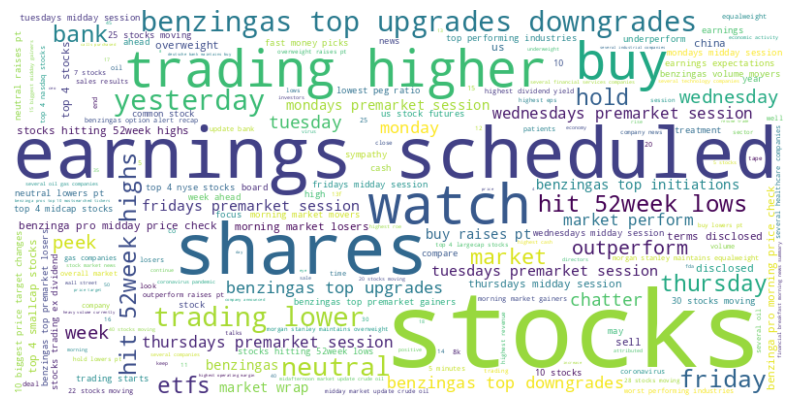

In [55]:
from wordcloud import WordCloud

# Create the word cloud from the keyword frequency data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
!pip install scikit-learn

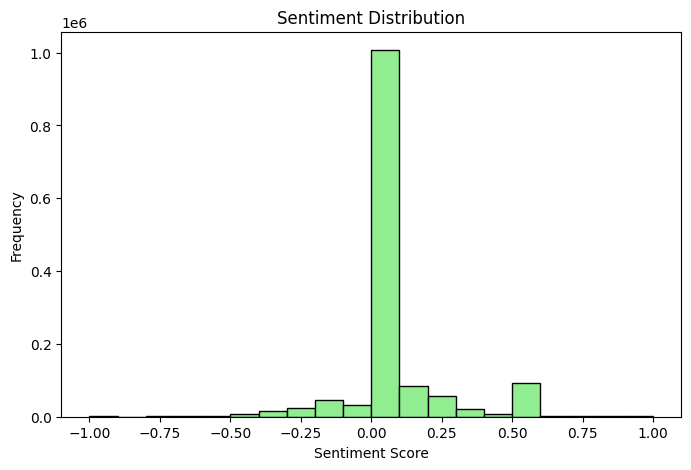

In [62]:
from textblob import TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

sentiment_data['sentiment'] = sentiment_data['cleaned_text'].apply(get_sentiment)

# Visualize the sentiment distribution
plt.figure(figsize=(8, 5))
plt.hist(sentiment_data['sentiment'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()
